# Genetic Search Visualization
The paper proposes Genetic Search as the approach of burte force search gets to expensive on huge label regions counts (many nodes --> many edges --> many possible table definitions).

This notebook showcases how the genetic search works and how the search space increases over edge count.

In [2]:
import random

from tqdm import tqdm


def generate_random_inits(dna_size):
    return [random.choice([0, 1]) for _ in range(dna_size)]


seen_individuals = []
seen_individuals_count = {}


def generate_all_living_beings(dna_size, n_gen, n_pop, n_offspring):
    global seen_individuals
    global seen_individuals_count
    seen_individuals = []
    seen_individuals_count = {}

    population = [generate_random_inits(dna_size) for _ in range(n_pop)]
    for pop in population:
        seen_individuals_count[str(pop)] = seen_individuals_count.get(str(pop), 0) + 1

    seen_individuals.extend(population)
    for generation in range(n_gen):
        children = [generate_child(population) for _ in range(n_offspring)]
        seen_individuals.extend(children)
        total_population = population + children
        population = tournament_selection(total_population, n_pop)
    return seen_individuals


def generate_child(population, rand_mut_p=0.1, cross_mut_p=0.5):
    p = random.random()
    if p < rand_mut_p:
        # Do random mutation
        parent = random.choice(population)
        child = parent
        mutated_index = random.randint(0, len(parent) - 1)
        child[mutated_index] = int(not child[mutated_index])
    elif rand_mut_p < p < rand_mut_p + cross_mut_p:
        # Do uniform cross mutation
        father, mother = random.sample(population, 2)

        # For each index, randomly choose either p1 or p2 bit
        child = [random.choice([father[i], mother[i]]) for i in range(len(father))]
    else:
        # No mutation
        child = random.choice(population)

    seen_individuals_count[str(child)] = seen_individuals_count.get(str(child), 0) + 1
    return child


def tournament_selection(population, n_survivors, rooster_size=3):
    survivors = []
    for _ in range(n_survivors):
        # Choose participants
        rooster = random.sample(population, rooster_size)
        # Select fittest of participants as survivor
        fittest_individual_of_rooster = get_best_individual(rooster)
        population.remove(fittest_individual_of_rooster)
        survivors.append(fittest_individual_of_rooster)
    return survivors


def rate_individual(individual):
    return sum(individual)


def get_best_individual(rooster):
    best_individual = rooster[0]
    best_rating = rate_individual(best_individual)
    for individual in rooster:
        if rate_individual(individual) < best_rating:
            best_individual = individual
            best_rating = rate_individual(individual)
    return best_individual

In [12]:
import math
def eval_genetic_search(dna_size):
    """Returns n_pop, # potential combinations, # seen combinations"""
    n_pop =  math.ceil(math.log10(dna_size) * 100)
    living_beings = generate_all_living_beings(dna_size, 200, n_pop, n_pop)
    count_unique_living_beings = len(set(["-".join(map(str, being)) for being in living_beings]))
    potential_unique_living_beings = 2 ** dna_size
    
    best_score = max([sum(b) for b in living_beings])
    return n_pop, count_unique_living_beings, potential_unique_living_beings, best_score
    

In [17]:
from tqdm import tqdm
x = list(range(11, 200))
results = [eval_genetic_search(n) for n in tqdm(x)]



  0%|          | 0/189 [00:00<?, ?it/s]

 74%|███████▍  | 29/39 [00:49<00:17,  1.72s/it]


  1%|          | 2/189 [00:00<00:41,  4.54it/s]

  2%|▏         | 3/189 [00:00<00:41,  4.49it/s]

  2%|▏         | 4/189 [00:00<00:43,  4.28it/s]

  3%|▎         | 5/189 [00:01<00:44,  4.17it/s]

  3%|▎         | 6/189 [00:01<00:45,  4.02it/s]

  4%|▎         | 7/189 [00:01<00:47,  3.86it/s]

  4%|▍         | 8/189 [00:02<00:49,  3.68it/s]

  5%|▍         | 9/189 [00:02<00:51,  3.51it/s]

  5%|▌         | 10/189 [00:02<00:55,  3.24it/s]

  6%|▌         | 11/189 [00:03<00:57,  3.11it/s]

  6%|▋         | 12/189 [00:03<00:59,  2.99it/s]

  7%|▋         | 13/189 [00:03<01:00,  2.89it/s]

  7%|▋         | 14/189 [00:04<01:02,  2.79it/s]

  8%|▊         | 15/189 [00:04<01:04,  2.69it/s]

  8%|▊         | 16/189 [00:04<01:06,  2.59it/s]

  9%|▉         | 17/189 [00:05<01:10,  2.43it/s]

 10%|▉         | 18/189 [00:05<01:12,  2.36it/s]

 10%|█         | 19/189 [00:06<01:14,  2.29it/s]

 11%|█         

 77%|███████▋  | 145/189 [03:37<02:11,  2.99s/it]

 77%|███████▋  | 146/189 [03:40<02:08,  3.00s/it]

 78%|███████▊  | 147/189 [03:43<02:04,  2.97s/it]

 78%|███████▊  | 148/189 [03:46<02:01,  2.96s/it]

 79%|███████▉  | 149/189 [03:49<01:58,  2.96s/it]

 79%|███████▉  | 150/189 [03:52<01:56,  2.98s/it]

 80%|███████▉  | 151/189 [03:56<01:56,  3.07s/it]

 80%|████████  | 152/189 [03:59<01:55,  3.12s/it]

 81%|████████  | 153/189 [04:02<01:54,  3.18s/it]

 81%|████████▏ | 154/189 [04:06<01:53,  3.25s/it]

 82%|████████▏ | 155/189 [04:09<01:49,  3.23s/it]

 83%|████████▎ | 156/189 [04:12<01:46,  3.23s/it]

 83%|████████▎ | 157/189 [04:15<01:44,  3.27s/it]

 84%|████████▎ | 158/189 [04:19<01:41,  3.28s/it]

 84%|████████▍ | 159/189 [04:22<01:38,  3.28s/it]

 85%|████████▍ | 160/189 [04:25<01:35,  3.29s/it]

 85%|████████▌ | 161/189 [04:29<01:33,  3.34s/it]

 86%|████████▌ | 162/189 [04:32<01:31,  3.38s/it]

 86%|████████▌ | 163/189 [04:36<01:28,  3.41s/it]

 87%|████████▋ | 164/189 [04:39

In [18]:
n_pops, count_uniques, count_potentials, best_scores = list(zip(*results))

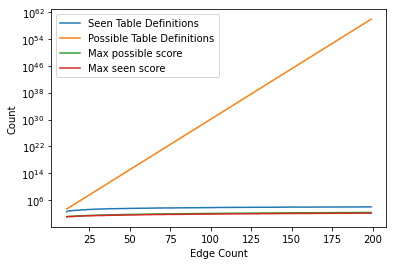

In [19]:
import matplotlib.pyplot as plt

#plt.plot(x, n_pops, label="Population Size")
plt.plot(x, count_uniques, label="Seen Table Definitions")
plt.plot(x, count_potentials, label="Possible Table Definitions")
plt.plot(x, x, label="Max possible score")
plt.plot(x, best_scores, label="Max seen score")


plt.yscale("log")
plt.xlabel("Edge Count")
plt.ylabel("Count")
plt.legend()

As you can see with growing edge count we see less and less of the search space. In the beginning this increasing gap is not as relevant, 

In [22]:
res = [eval_genetic_search(n) for n in tqdm([10, 20, 100, 500, 1000, 2000, 5000])]

100%|██████████| 7/7 [03:59<00:00, 34.26s/it]


In [23]:
n_pops, count_uniques, count_potentials, best_scores = list(zip(*res))

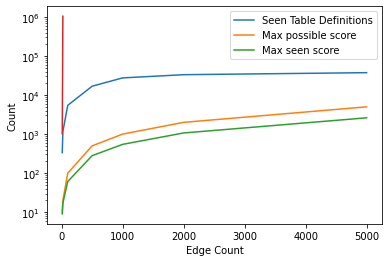

In [33]:
import matplotlib.pyplot as plt

x = [10, 20, 100, 500, 1000, 2000, 5000]
#plt.plot(x, n_pops, label="Population Size")
plt.plot(x, count_uniques, label="Seen Table Definitions")
# plt.plot(x, count_potentials, label="Possible Table Definitions")
plt.plot(x, x, label="Max possible score")
plt.plot(x, best_scores, label="Max seen score")
plt.plot(x[:2], list(map(lambda i: 2**i, x[:2])))


plt.yscale("log")
plt.xlabel("Edge Count")
plt.ylabel("Count")
plt.legend()